#Importação das bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importação e visualização de dados


In [2]:
df_brasileiro_full = pd.read_csv('campeonato-brasileiro-full.csv')
df_brasileiro_full.head(10)
df_brasileiro_full.fillna('-')

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,-,-,-,-,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,-,-,-,-,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,-,-,-,-,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,-,-,-,-,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,-,-,-,-,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,8783,38,08/12/2024,16:04,Cuiaba,Vasco,4-3-3,4-3-2-1,B. Franco,F. Loureiro,Vasco,Arena Pantanal,1,2,MT,RJ
8781,8784,38,08/12/2024,16:04,Palmeiras,Fluminense,4-2-3-1,4-2-3-1,A. Moreira Ferreira,L. Venker de Menezes,Fluminense,Allianz Parque,0,1,SP,RJ
8782,8776,38,08/12/2024,16:05,Fortaleza,Internacional,4-2-3-1,4-1-2-1-2,J. Vojvoda,R. Machado Marques,Fortaleza,Arena Castelão,3,0,CE,RS
8783,8780,38,08/12/2024,16:05,Bragantino,Criciuma,4-2-3-1,4-1-2-1-2,F. Seabra,C. Tencati,Bragantino,Nabizão,5,1,SP,SC


In [3]:
df_brasileiro_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8785 non-null   int64 
 1   rodata              8785 non-null   int64 
 2   data                8785 non-null   object
 3   hora                8785 non-null   object
 4   mandante            8785 non-null   object
 5   visitante           8785 non-null   object
 6   formacao_mandante   3810 non-null   object
 7   formacao_visitante  3810 non-null   object
 8   tecnico_mandante    4175 non-null   object
 9   tecnico_visitante   4175 non-null   object
 10  vencedor            8785 non-null   object
 11  arena               8785 non-null   object
 12  mandante_Placar     8785 non-null   int64 
 13  visitante_Placar    8785 non-null   int64 
 14  mandante_Estado     8785 non-null   object
 15  visitante_Estado    8785 non-null   object
dtypes: int64(4), object(12)


#Tratamento de dados


### Criando a coluna "saldo de gols"

In [4]:
df_brasileiro_full['saldo_mandante'] = df_brasileiro_full['mandante_Placar'] - df_brasileiro_full['visitante_Placar']
df_brasileiro_full['saldo_visitante'] = df_brasileiro_full['visitante_Placar'] - df_brasileiro_full['mandante_Placar']

##Criando a coluna "técnico vencedor"


In [5]:
def tecnico_vencedor(row):
    if row['mandante_Placar'] > row['visitante_Placar']:
        return row['tecnico_mandante']
    elif row['visitante_Placar'] > row['mandante_Placar']:
        return row['tecnico_visitante']
    else:
        return np.nan

# Criar a nova coluna
df_brasileiro_full['tecnico_vencedor'] = df_brasileiro_full.apply(tecnico_vencedor, axis=1)


##Verificando as colunas novas

In [6]:
df_brasileiro_full.head(10)
df_brasileiro_full.fillna('-')

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,saldo_mandante,saldo_visitante,tecnico_vencedor
0,1,1,29/03/2003,16:00,Guarani,Vasco,-,-,-,-,Guarani,Brinco de Ouro,4,2,SP,RJ,2,-2,-
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,-,-,-,-,Athletico-PR,Arena da Baixada,2,0,PR,RS,2,-2,-
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,-,-,-,-,-,Maracanã,1,1,RJ,PR,0,0,-
3,4,1,30/03/2003,16:00,Goias,Paysandu,-,-,-,-,-,Serra Dourada,2,2,GO,PA,0,0,-
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,-,-,-,-,-,Beira Rio,1,1,RS,SP,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,8783,38,08/12/2024,16:04,Cuiaba,Vasco,4-3-3,4-3-2-1,B. Franco,F. Loureiro,Vasco,Arena Pantanal,1,2,MT,RJ,-1,1,F. Loureiro
8781,8784,38,08/12/2024,16:04,Palmeiras,Fluminense,4-2-3-1,4-2-3-1,A. Moreira Ferreira,L. Venker de Menezes,Fluminense,Allianz Parque,0,1,SP,RJ,-1,1,L. Venker de Menezes
8782,8776,38,08/12/2024,16:05,Fortaleza,Internacional,4-2-3-1,4-1-2-1-2,J. Vojvoda,R. Machado Marques,Fortaleza,Arena Castelão,3,0,CE,RS,3,-3,J. Vojvoda
8783,8780,38,08/12/2024,16:05,Bragantino,Criciuma,4-2-3-1,4-1-2-1-2,F. Seabra,C. Tencati,Bragantino,Nabizão,5,1,SP,SC,4,-4,F. Seabra


#Qual time tem o maior número de vitórias?

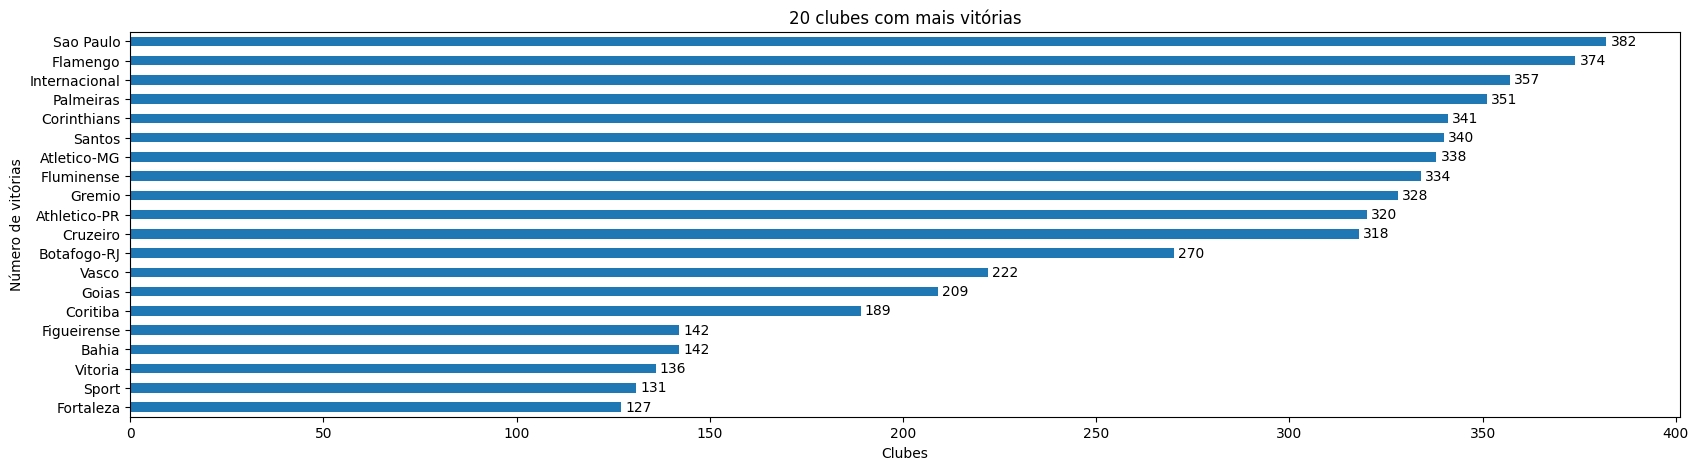

In [7]:
# Criar dataframe de vitórias
vitorias_mandante = df_brasileiro_full[df_brasileiro_full['mandante_Placar'] > df_brasileiro_full['visitante_Placar']]['mandante'].value_counts()
vitorias_visitante = df_brasileiro_full[df_brasileiro_full['visitante_Placar'] > df_brasileiro_full['mandante_Placar']]['visitante'].value_counts()

vitorias_total = vitorias_mandante.add(vitorias_visitante, fill_value=0).sort_values(ascending=False)

# construção de gráficos
plt.figure(figsize=(20,5))
ax = vitorias_total.head(20).plot(kind='barh')

# adiciona os números no final da barra
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)

plt.title("20 clubes com mais vitórias")
plt.ylabel("Número de vitórias")
plt.xlabel("Clubes")
plt.gca().invert_yaxis()  # mantém os maiores no topo
plt.show()



#Qual time teve o melhor desempenho como mandante e como visitante ao longo dos anos?

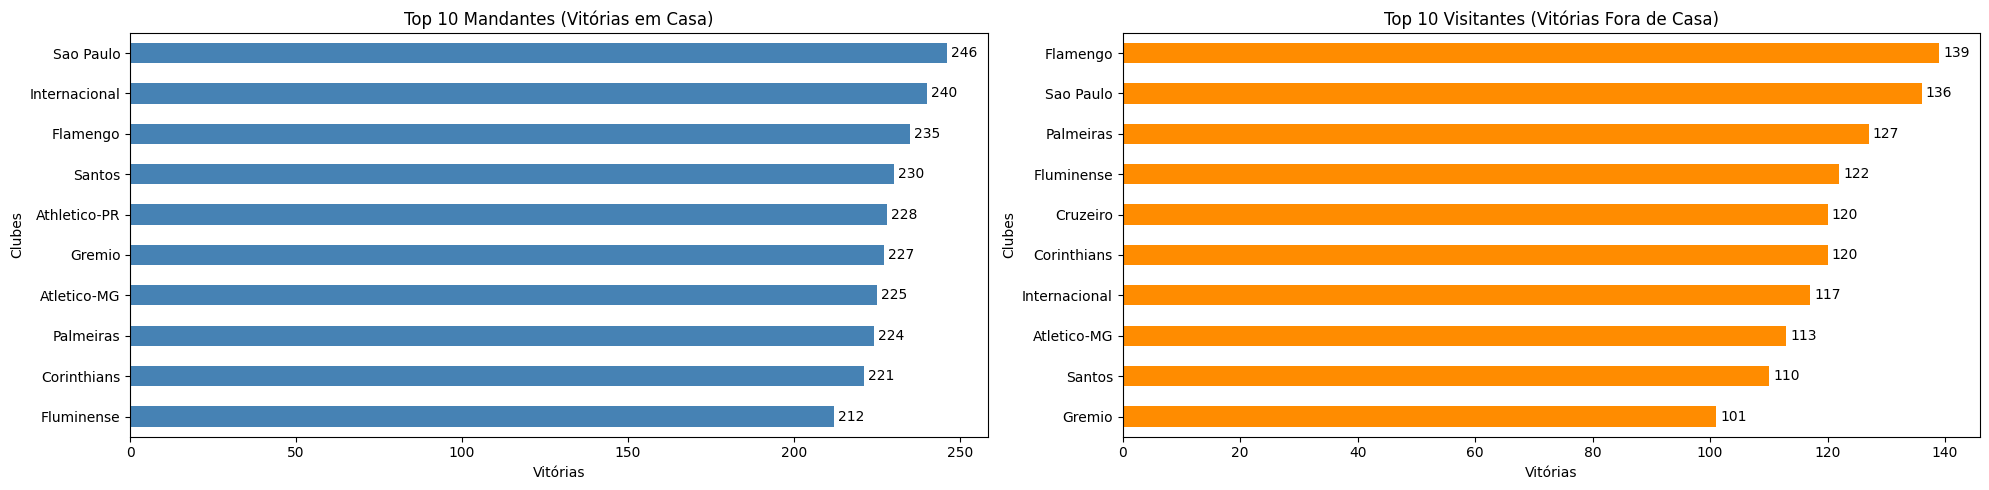

In [8]:
#selecionando os top 10 mandantes e visitantes
top10_mandante = vitorias_mandante.head(10)
top10_visitante = vitorias_visitante.head(10)

#criando 2 gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(20,5))

#construção de gráfico de mandantes
top10_mandante.plot(kind='barh', ax=ax[0], color='steelblue')
ax[0].set_title("Top 10 Mandantes (Vitórias em Casa)")
ax[0].invert_yaxis()
ax[0].set_xlabel("Vitórias")
ax[0].set_ylabel("Clubes")

ax[0].bar_label(ax[0].containers[0], fmt='%d', label_type='edge', padding=3)

#construção de gráfico de visitantes
top10_visitante.plot(kind='barh', ax=ax[1], color='darkorange')
ax[1].set_title("Top 10 Visitantes (Vitórias Fora de Casa)")
ax[1].invert_yaxis()
ax[1].set_xlabel("Vitórias")
ax[1].set_ylabel("Clubes")

ax[1].bar_label(ax[1].containers[0], fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

#Quais estádios receberam mais jogos e como isso impacta no desempenho dos times locais?

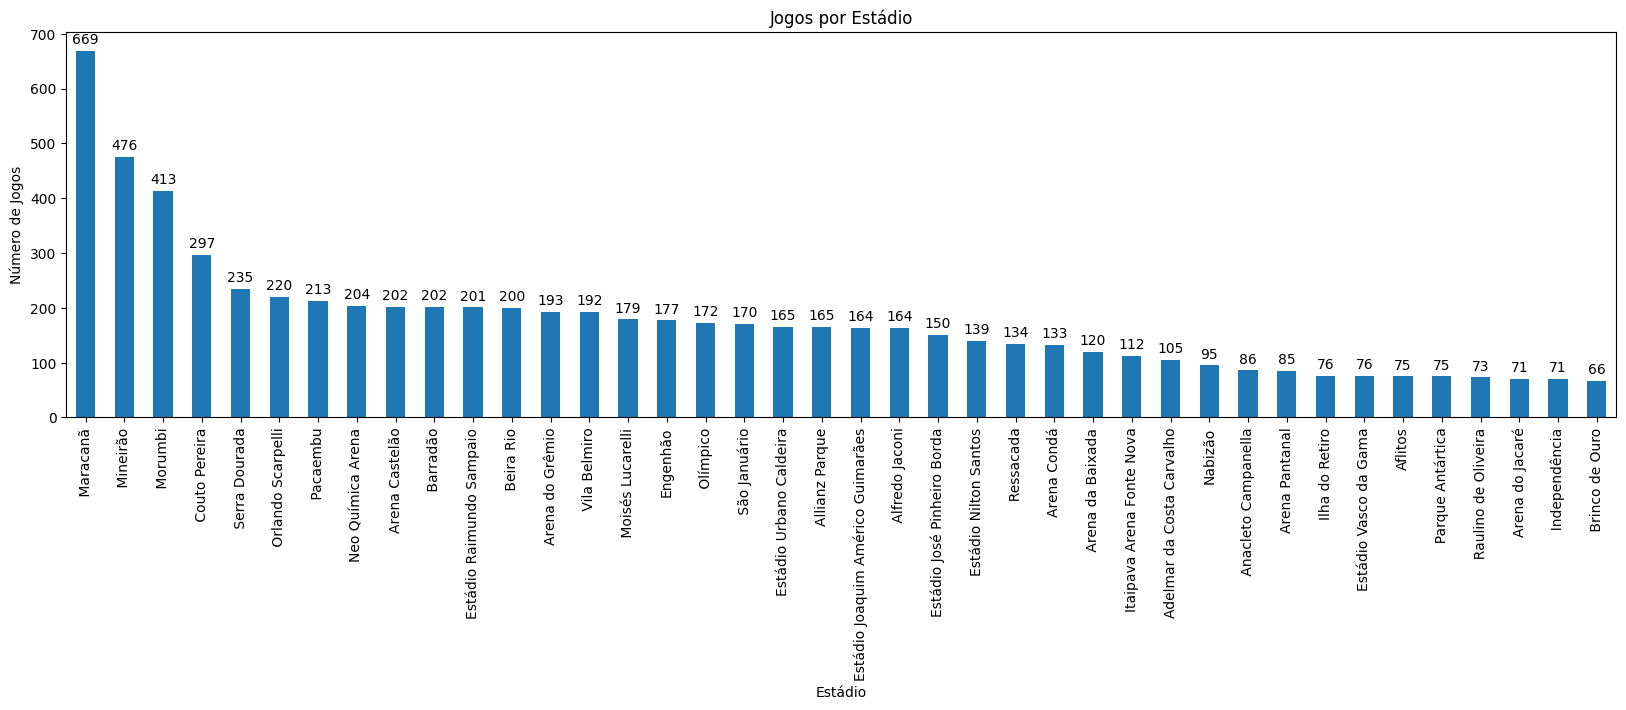

In [9]:
#contagem de jogos em cada estádio
jogos_por_estadio = df_brasileiro_full['arena'].value_counts().head(40)

#construção do gráfico
plt.figure(figsize=(20,5))
ax = jogos_por_estadio.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
plt.title("Jogos por Estádio")
plt.ylabel("Número de Jogos")
plt.xlabel("Estádio")
plt.show()

#Existe vantagem significativa para os times que jogam em casa (home advantage)?

Text(0.5, 1.0, 'Correlação entre resultados (mandante, visitante, empate)')

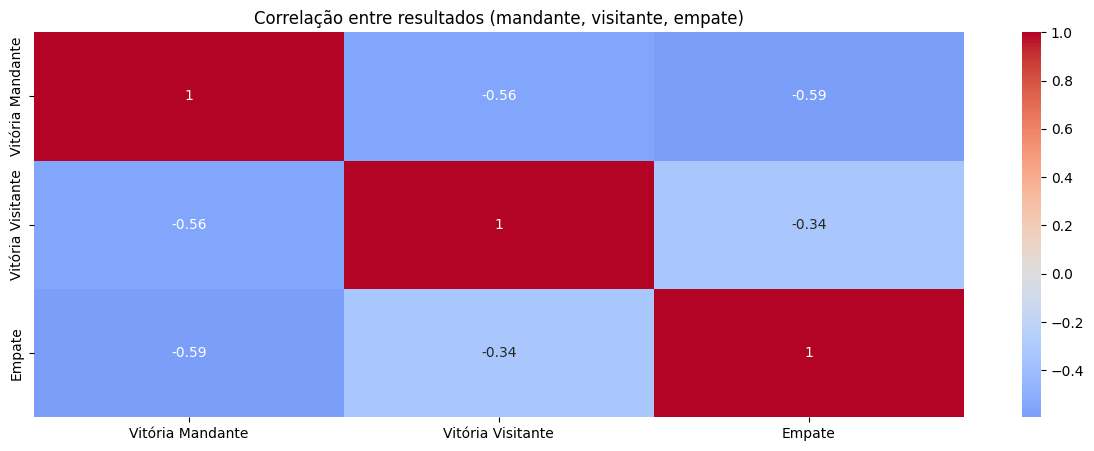

In [10]:
df_brasileiro_full["vitoria_mandante"] = (df_brasileiro_full["vencedor"] == df_brasileiro_full["mandante"]).astype(int)
df_brasileiro_full["vitoria_visitante"] = (df_brasileiro_full["vencedor"] == df_brasileiro_full["visitante"]).astype(int)
df_brasileiro_full["empate"] = (df_brasileiro_full["vencedor"] == "-").astype(int)

resultados = df_brasileiro_full[["vitoria_mandante", "vitoria_visitante", "empate"]]
resultados = resultados.rename(columns={"vitoria_mandante": "Vitória Mandante", "vitoria_visitante": "Vitória Visitante","empate": "Empate"})

correlacao = resultados.corr()

plt.figure(figsize=(15,5))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", center=0)
plt.title("Correlação entre resultados (mandante, visitante, empate)")

#Quais técnicos tiveram maior número de vitórias no Campeonato Brasileiro?

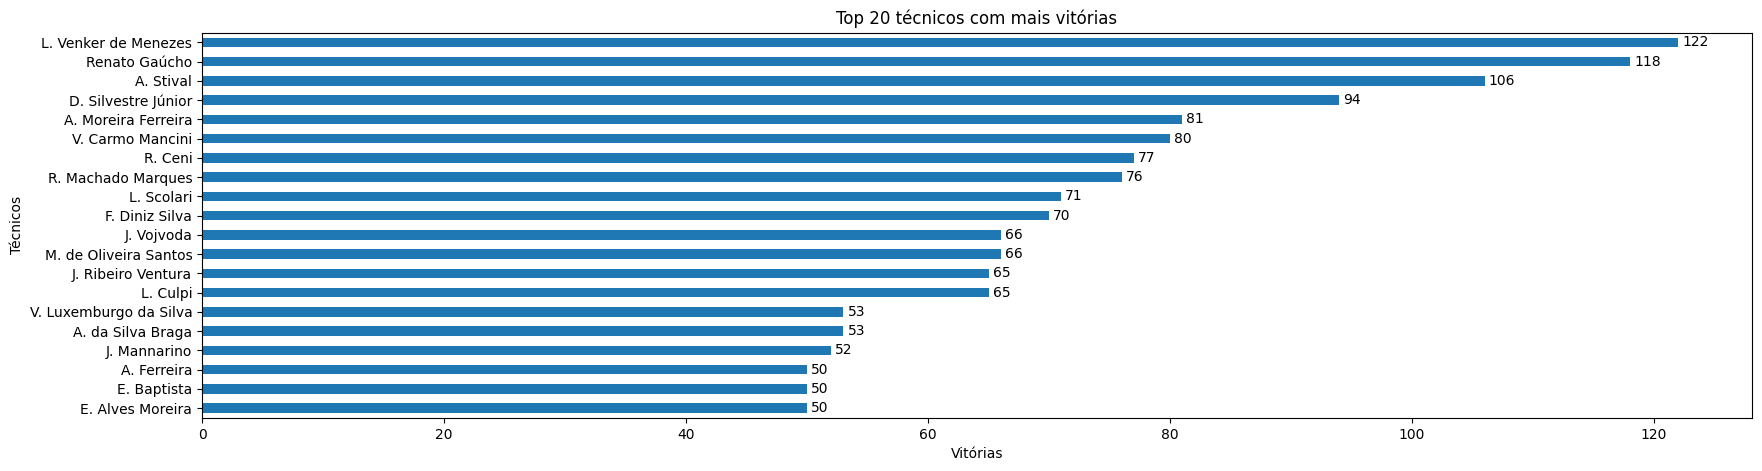

In [11]:
#contagem de vitória de cada técnico
vitorias_por_tecnico = df_brasileiro_full['tecnico_vencedor'].dropna().value_counts()

#construção de gráfico de mandantes
plt.figure(figsize=(20,5))
ax = vitorias_por_tecnico.head(20).plot(kind='barh')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
plt.title("Top 20 técnicos com mais vitórias")
plt.ylabel("Técnicos")
plt.xlabel("Vitórias")
plt.gca().invert_yaxis()
plt.show()

#Quais confrontos entre times geram mais gols (clássicos mais movimentados)?

###Mandantes


In [12]:
df_brasileiro_full = pd.read_csv('campeonato-brasileiro-full.csv')

df_brasileiro_full = df_brasileiro_full[['mandante', 'mandante_Placar', 'visitante_Placar','visitante', 'vencedor', 'arena', 'data', 'hora']]
df_brasileiro_full.sort_values('mandante_Placar', ascending=False).head(10).fillna('-')

,mandante,mandante_Placar,visitante_Placar,visitante,vencedor,arena,data,hora
66,Goias,7,0,Juventude,Goias,Serra Dourada,27/04/2003,16:00
1504,Corinthians,7,1,Santos,Corinthians,Pacaembu,06/11/2005,16:00
1258,Athletico-PR,7,2,Vasco,Athletico-PR,Arena da Baixada,27/07/2005,21:45
936,Sao Paulo,7,0,Paysandu,Sao Paulo,Morumbi,28/09/2004,20:30
1002,Fluminense,7,1,Juventude,Fluminense,Raulino de Oliveira,27/10/2004,20:30
616,Criciuma,7,2,Goias,Criciuma,Heriberto Hulse,16/05/2004,16:00
8300,Internacional,7,1,Santos,Internacional,Estádio Beira-Rio,22/10/2023,16:00
6874,Flamengo,6,1,Avai,Flamengo,Maracanã,05/12/2019,20:03
733,Internacional,6,0,Athletico-PR,Internacional,Beira Rio,17/07/2004,16:00
727,Athletico-PR,6,0,Goias,Athletico-PR,Arena da Baixada,13/07/2004,20:30


###Visitantes

In [13]:
df_brasileiro_full = pd.read_csv('campeonato-brasileiro-full.csv')

df_brasileiro_full = df_brasileiro_full[['mandante', 'mandante_Placar', 'visitante_Placar','visitante', 'vencedor', 'arena', 'data', 'hora']]
df_brasileiro_full.sort_values('visitante_Placar', ascending=False).head(10).fillna('-')

,mandante,mandante_Placar,visitante_Placar,visitante,vencedor,arena,data,hora
450,Bahia,4,7,Santos,Santos,Fonte Nova,22/10/2003,21:40
2447,Figueirense,1,7,Gremio,Gremio,Orlando Scarpelli,17/07/2008,20:30
547,Bahia,0,7,Cruzeiro,Cruzeiro,Fonte Nova,14/12/2003,16:00
1946,Figueirense,3,6,Athletico-PR,Athletico-PR,Orlando Scarpelli,12/05/2007,18:10
8462,Vasco,1,6,Flamengo,Flamengo,Maracanã,02/06/2024,16:00
1353,Cruzeiro,2,6,Fluminense,Fluminense,Mineirão,07/09/2005,21:45
1446,Flamengo,1,6,Sao Paulo,Sao Paulo,Luso Brasileiro,16/10/2005,16:00
8275,Goias,4,6,Bahia,Bahia,Estádio Hailé Pinheiro - Serrinha,07/10/2023,16:01
5793,Chapecoense,3,6,Gremio,Gremio,Arena Condá,08/06/2017,20:01
1542,Ponte Preta,2,6,Palmeiras,Palmeiras,Moisés Lucarelli,20/11/2005,18:10


#Quais estados concentram mais vitórias no campeonato (força regional)?

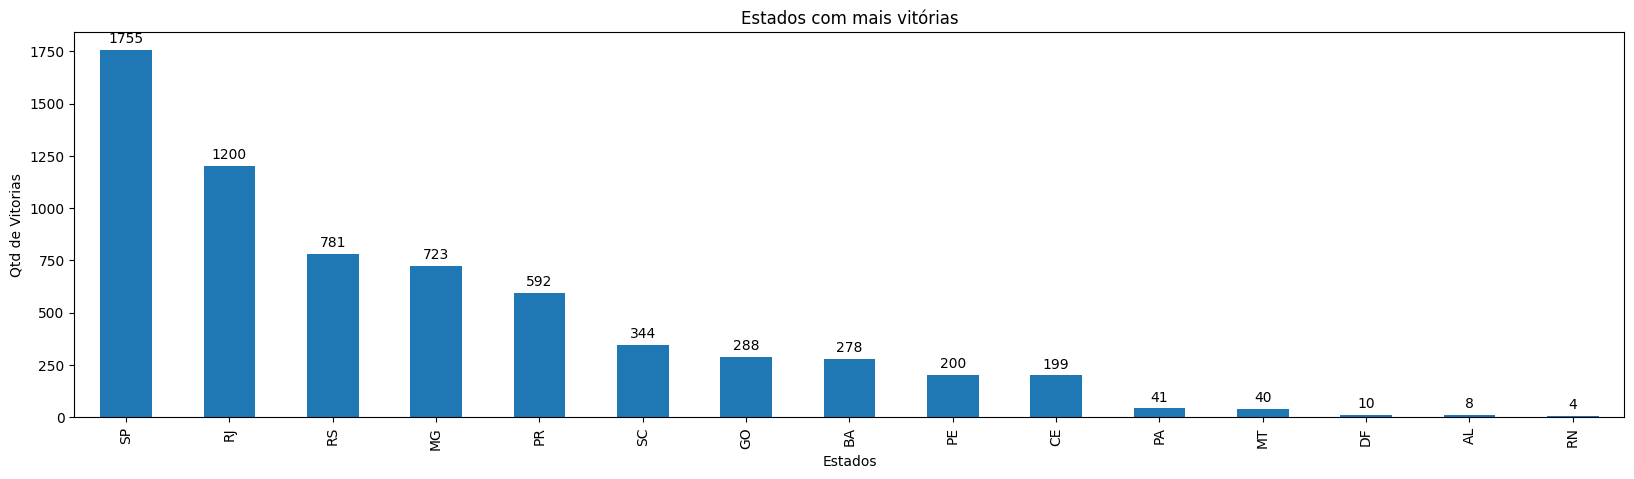

In [14]:
df_brasileiro_full = pd.read_csv('campeonato-brasileiro-full.csv')

#função para identificar o estado do time vencedor
def get_vencedor_estado(row):
    if row['vencedor'] == '-':
        return None  # Empate
    elif row['vencedor'] == row['mandante']:
        return row['mandante_Estado']
    elif row['vencedor'] == row['visitante']:
        return row['visitante_Estado']
    else:
        return None
#aplica a função linha por linha
df_brasileiro_full['vencedor_estado'] = df_brasileiro_full.apply(get_vencedor_estado, axis=1)

#contagem de vitórias cada estado teve
estados_mais_vitorias = df_brasileiro_full['vencedor_estado'].value_counts()

# Construção do gráfico
plt.figure(figsize=(20,5))
ax = estados_mais_vitorias.plot(kind="bar")
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
plt.title("Estados com mais vitórias")
plt.ylabel("Qtd de Vitorias")
plt.xlabel("Estados")
plt.show()

#Como evoluiu a média de gols por jogo ao longo dos anos?

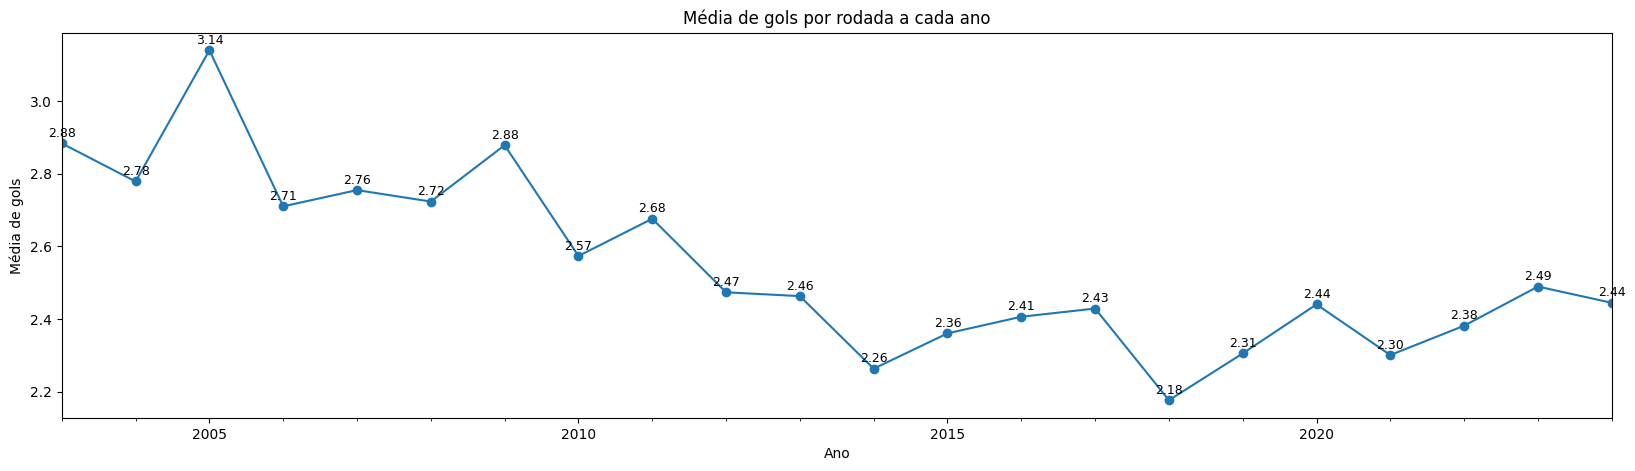

In [15]:
#somando o total de gols em cada partida
df_brasileiro_full['total_gols'] = df_brasileiro_full['mandante_Placar'] + df_brasileiro_full['visitante_Placar']

#definindo o formato de datas
df_brasileiro_full['data'] = pd.to_datetime(df_brasileiro_full['data'], format='%d/%m/%Y')

#definindo o período dos gols "por ano"
df_brasileiro_full['ano_mes'] = df_brasileiro_full['data'].dt.to_period("Y")

#função que calcula a média de gols
gols_por_mes = df_brasileiro_full.groupby('ano_mes')['total_gols'].mean()


#construção do gráfico
plt.figure(figsize=(20,5))
gols_por_mes.plot(kind='line', marker='o')
plt.title("Média de gols por rodada a cada ano")
plt.ylabel("Média de gols")
plt.xlabel("Ano")

for x, y in zip(gols_por_mes.index, gols_por_mes.values):
    plt.text(x, y + 0.018, f"{y:.2f}", ha='center', fontsize=9)
#plt.grid(True)

plt.show()

#Quais times têm o melhor saldo de gols histórico?

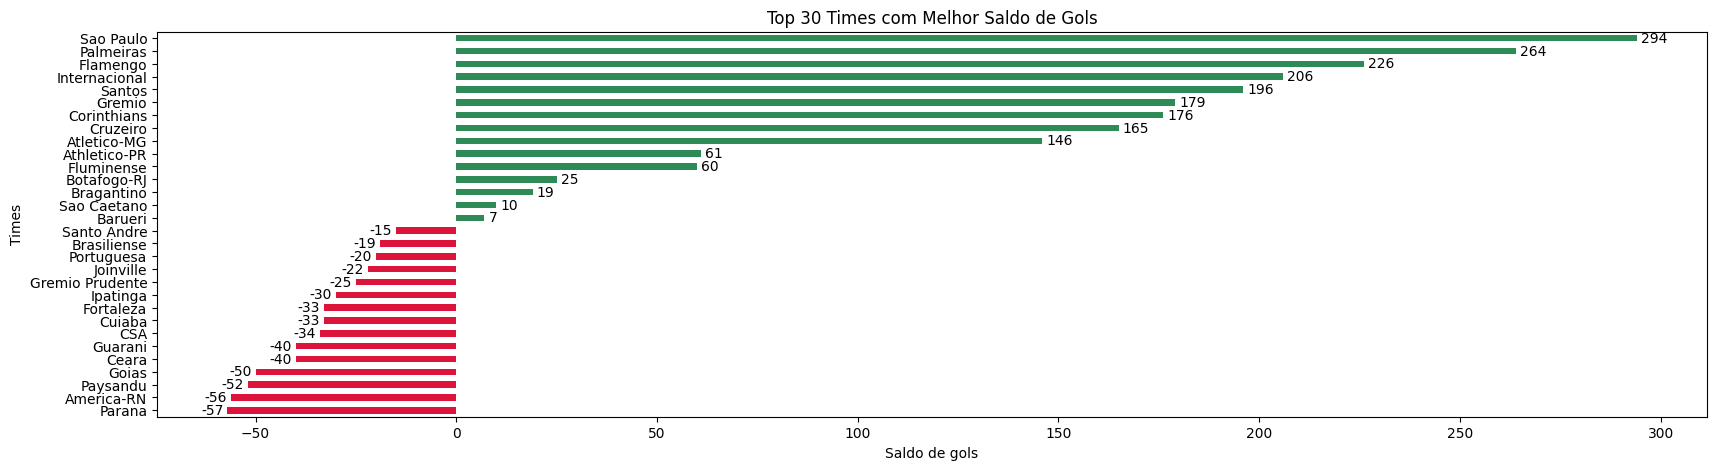

In [16]:
df_brasileiro_full["saldo_mandante"] = df_brasileiro_full["mandante_Placar"] - df_brasileiro_full["visitante_Placar"]
df_brasileiro_full["saldo_visitante"] = df_brasileiro_full["visitante_Placar"] - df_brasileiro_full["mandante_Placar"]


# contagem de saldo de gols por clube mandante
saldo_mandante = df_brasileiro_full.groupby('mandante')['saldo_mandante'].sum()

# contagem de saldo de gols por clube visitante
saldo_visitante = df_brasileiro_full.groupby('visitante')['saldo_visitante'].sum()

# cálculo do saldo total
saldo_total = saldo_mandante.add(saldo_visitante, fill_value=0)

# ordenando os 30 primeiros
saldo_sorted = saldo_total.sort_values(ascending=False).head(30)

# definindo as cores
colors = ['seagreen' if v >= 0 else 'crimson' for v in saldo_sorted]

# construção do gráfico
plt.figure(figsize=(20,5))
ax = saldo_sorted.plot(kind='barh', color=colors)

# adicionando os valores nas barras
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)

plt.title("Top 30 Times com Melhor Saldo de Gols")
plt.xlabel("Saldo de gols")
plt.ylabel("Times")
plt.gca().invert_yaxis()

plt.show()

#Quais são os times mais consistentes (maior número de empates) ao longo da história?

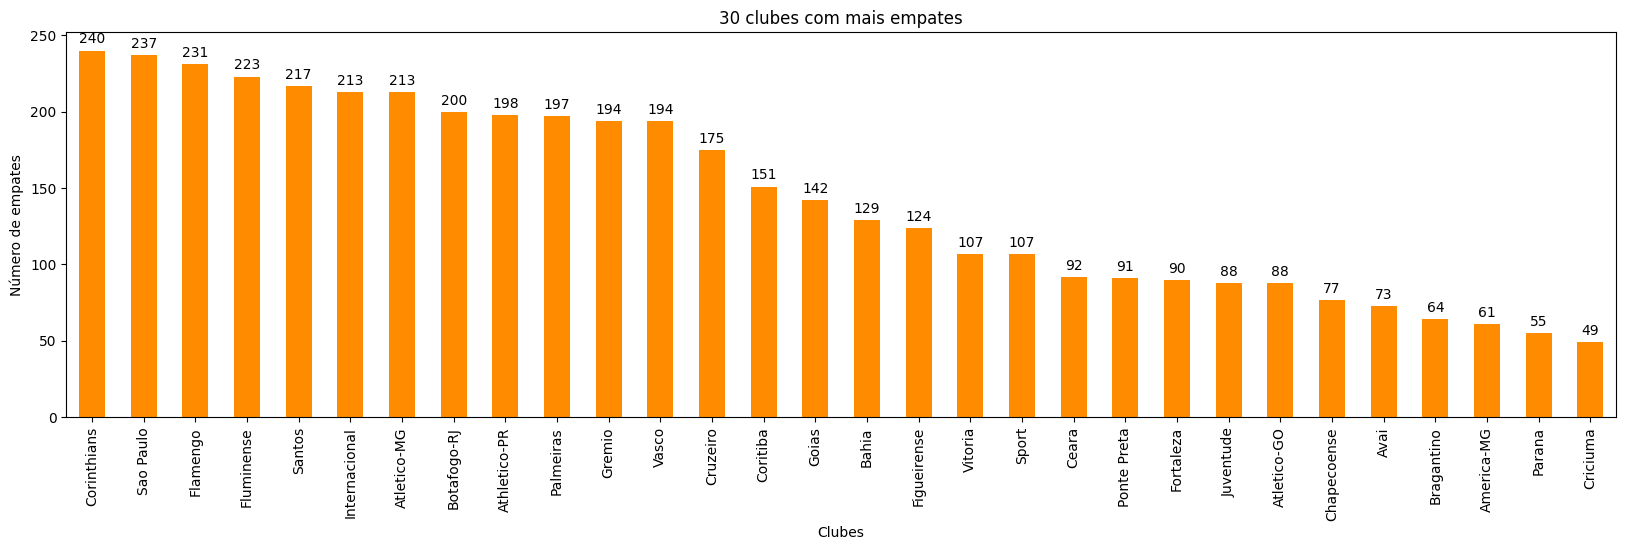

In [17]:
#criando dataframe de empates
empates = df_brasileiro_full[df_brasileiro_full['mandante_Placar'] == df_brasileiro_full['visitante_Placar']]
empates_por_time = (empates['mandante'].value_counts() + empates['visitante'].value_counts()).sort_values(ascending=False)

#construção do gráfico
plt.figure(figsize=(20,5))
ax = empates_por_time.head(30).plot(kind='bar', color ='darkorange')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
plt.title("30 clubes com mais empates")
plt.ylabel("Número de empates")
plt.xlabel("Clubes")
plt.show()